In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [73]:
df = pd.read_csv('Final.csv')

In [74]:
df.columns

Index(['movie_id', 'Crime', 'Drama', 'Comedy', 'Action', 'Thriller',
       'Adventure', 'Science Fiction', 'Animation', 'Family', 'Romance',
       'Mystery', 'Music', 'Horror', 'Fantasy', 'Documentary', 'War',
       'Western', 'History', 'Foreign', 'TV Movie', 'imdb_id', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'revenue', 'budget',
       'Cast 1', 'Cast 2', 'Production', 'Month', 'Year', 'Error'],
      dtype='object')

In [75]:
df.drop(['movie_id','imdb_id','Year','Error','release_date'], axis=1, inplace =True)

In [76]:
df.isnull().sum()


Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month              0
dtype: int64

In [77]:
df = pd.get_dummies(data = df, columns = ['Month'], drop_first=True)

In [78]:
df.isnull().sum()

Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month_2            0
Month_3            0
Month_4            0
Month_5            0
Month_6            0
Month_7            0
Month_8            0
Month_9            0
Month_10           0
Month_11           0
Month_12           0
dtype: int64

# 1. OLS 

## 1.1 Model specifications:

In [79]:
from statsmodels.tools.tools import add_constant
X = df.drop('revenue',axis=1)
y = df.revenue
col_to_std = X.nunique()[X.nunique()>10].index.to_list() 
#standardizing: 
X[col_to_std] = (X[col_to_std]-X[col_to_std].mean())/X[col_to_std].std()
y= (y-y.mean())/y.std()
X = add_constant(X)


In [9]:
model = sm.OLS(y,X.astype(int)).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     505.1
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:04:28   Log-Likelihood:                -13698.
No. Observations:               13912   AIC:                         2.747e+04
Df Residuals:                   13873   BIC:                         2.777e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3525      0.037     -9.586      0.000      -0.425      -0.280
Crime              -0.0509      0.016     -3.256      0.001      -0.082      -0.020
Drama              -0.1855      0.013    -13.921      0.000      -0.212      -0.159
Comedy             -0.0651      0.014     -4.591      0.000      -0.093      -0.037
Action              0.1261      0.015      8.429      0.000       0.097       0.155
Thriller           -0.0306      0.014     -2.155      0.031      -0.058      -0.003
Adventure           0.2463      0.017     14.421      0.000       0.213       0.280
Science Fiction    -0.0788      0.019     -4.259      0.000      -0.115      -0.043
Animation           0.2752      0.033      8.373      0.000       0.211       0.340
Family              0.2232      0.025      8.975      0.000       0.174       0.272
Romance             0.0818      0.015      5.330      0.000       0.052       0.112
Mystery            -0.0041      0.020     -0.210      0.834      -0.043       0.034
Music               0.0770      0.036      2.122      0.034       0.006       0.148
Horror             -0.0550      0.021     -2.568      0.010      -0.097      -0.013
Fantasy             0.2104      0.020     10.360      0.000       0.171       0.250
Documentary        -0.0635      0.098     -0.645      0.519      -0.256       0.129
War                -0.0008      0.031     -0.026      0.980      -0.062       0.060
Western            -0.2913      0.042     -6.973      0.000      -0.373      -0.209
History             0.0286      0.029      0.996      0.319      -0.028       0.085
Foreign            -0.3696      0.128     -2.899      0.004      -0.620      -0.120
TV Movie           -0.2597      0.460     -0.564      0.572      -1.162       0.642
popularity          0.1098      0.007     16.307      0.000       0.097       0.123
vote_average        0.0145      0.009      1.688      0.091      -0.002       0.031
vote_count          0.8063      0.009     92.283      0.000       0.789       0.823
budget             -0.0034      0.006     -0.617      0.537      -0.014       0.008
Cast 1              0.0583      0.013      4.349      0.000       0.032       0.085
Cast 2             -0.0188      0.019     -0.977      0.329      -0.057       0.019
Production          0.0261      0.005      4.790      0.000       0.015       0.037
Month_2             0.0482      0.029      1.636      0.102      -0.010       0.106
Month_3             0.0530      0.029      1.813      0.070      -0.004       0.110
Month_4             0.0783      0.030      2.642      0.008       0.020       0.136
Month_5             0.2077      0.028      7.404      0.000       0.153       0.263
Month_6             0.4301      0.030     14.327      0.000       0.371       0.489
Month_7             0.1583      0.030      5.312      0.000

#### -> low R square, some of the variables has high p-value

## 1.2 Checking OLS assumptions: 

### 1. Multicolinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Vif is used to check multicolinearity

In [12]:
VIF_result1 = pd.Series([vif(X.astype(int).values,i) for i in range(X.shape[1])],index=X.columns)
VIF_result1[VIF_result1>10]

const    44.704053
dtype: float64

#### -> no multicolinearilty

### 2. Normality

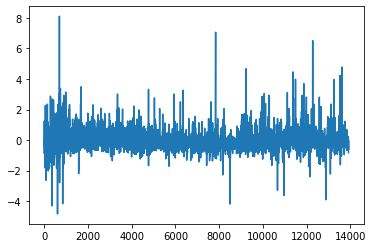

In [14]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

In [15]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [16]:
sms.jarque_bera(model.resid)

(295002.160019095, 0.0, 2.2573322112501186, 25.102821085831092)

### 3. Linearity

In [19]:
from scipy.stats import pearsonr
pearsonr(ypred,y)[1]

0.0

### 4. Homoskedasticity

In [20]:
sms.jarque_bera(model.resid)[1] < 0.05  # the 1st element is the skewness, if it is < 0.05 then the residual follow the normal distribution

True

In [21]:
sms.het_breuschpagan(model.resid, model.model.exog)

(2848.6594018845744, 0.0, 94.00285263099754, 0.0)

## 1.3 Prediction: 

In [22]:
ypred=model.predict(X)

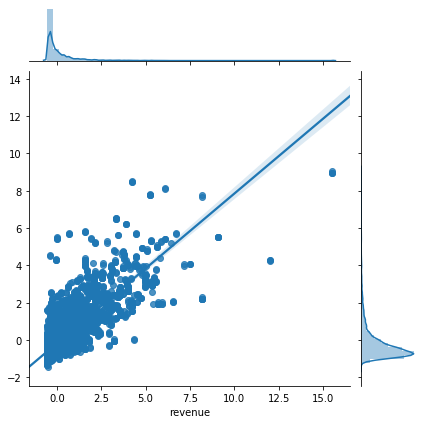

In [23]:
import seaborn as sns
sns.jointplot(y,ypred, kind='reg')

# 1.2 OLS - spliting test and train

## 1.2 Train test split:

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df.astype(int, inplace=True)

,Crime,Drama,Comedy,Action,Thriller,Adventure,Science Fiction,Animation,Family,Romance,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
col_to_std = df.nunique()[df.nunique()>10].index.to_list() 
df[col_to_std] = (df[col_to_std]-df[col_to_std].mean())/df[col_to_std].std()
df = add_constant(df)

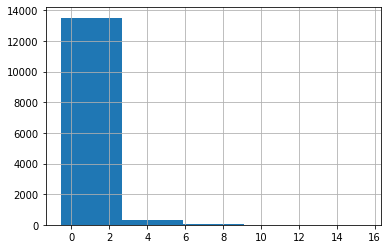

In [70]:
df.revenue.hist(bins=5)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


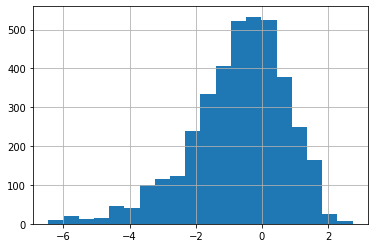

In [47]:
np.log(df.revenue).hist(bins=20)

In [86]:
a = np.log(df.revenue)
a = (a-a.mean())/a.std()
a.shape

(13912,)

In [87]:
a

0       -0.654052
1       -0.654052
2       -0.199141
3       -0.199141
4       -0.199141
5        1.539915
6        1.539915
7        1.633815
8        1.483366
9        1.212072
10       1.212072
11      -1.068127
12      -1.068127
13       0.290589
14       0.290589
15       0.290589
16       0.290589
17       0.290589
18       0.290589
19       0.290589
20       0.290589
21       0.290589
22       0.290589
23       0.290589
24       0.290589
25       0.290589
26       0.290589
27       0.290589
28       0.290589
29       0.290589
           ...   
13882   -0.953652
13883   -1.787499
13884    0.325599
13885    0.325599
13886    0.325599
13887    0.063448
13888    0.063448
13889    0.063448
13890   -0.838290
13891   -3.763121
13892   -2.474366
13893   -2.474366
13894   -2.474366
13895    0.092820
13896    0.092820
13897   -0.689901
13898   -2.720423
13899   -2.720423
13900    0.121446
13901    0.819980
13902    0.819980
13903   -0.017357
13904   -0.017357
13905   -0.051803
13906    0

In [88]:
X = df.drop('revenue', axis =1)
X.shape

(13912, 38)

In [89]:
X.budget= np.log(df.budget)
X.popularity=round(X.popularity, 2)

## 1.2 RFE

In [32]:
reg = LinearRegression()
rfe = RFE(reg,15)

In [91]:
rfe = rfe.fit(X,a)

In [92]:
print(rfe.ranking_)

[22  1  8  9 10  1 18  1  1 13 15 16  1 23 12  1  1  1  1  1 21  1 24  1
 19 17 11  3  5  4  7  1  1  6 14 20  2  1]


In [93]:
X.columns[rfe.support_]

Index(['Drama', 'Adventure', 'Animation', 'Family', 'Horror', 'War', 'Western',
       'History', 'Foreign', 'TV Movie', 'vote_average', 'budget', 'Month_6',
       'Month_7', 'Month_12'],
      dtype='object')

In [94]:
X_new = X[X.columns[rfe.support_]]

In [95]:
X_train, X_test, y_train, y_test= train_test_split(X_new, a, 
                                                   test_size=0.3, random_state=11)

In [96]:
import statsmodels.api as sm

In [97]:
model = sm.OLS(y_train,X_train)

In [98]:
model = model.fit()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                revenue   R-squared (uncentered):                   0.140
Model:                            OLS   Adj. R-squared (uncentered):              0.138
Method:                 Least Squares   F-statistic:                              105.3
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                   2.14e-303
Time:                        23:16:35   Log-Likelihood:                         -13161.
No. Observations:                9738   AIC:                                  2.635e+04
Df Residuals:                    9723   BIC:                                  2.646e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Drama           -0.4057      0.021    -19.341      0.000      -0.447      -0.365
Adventure        0.3310      0.027     12.277      0.000       0.278       0.384
Animation        0.0043      0.057      0.075      0.940      -0.107       0.116
Family           0.2667      0.041      6.510      0.000       0.186       0.347
Horror          -0.2598      0.034     -7.577      0.000      -0.327      -0.193
War              0.0262      0.053      0.497      0.619      -0.077       0.129
Western         -0.5121      0.071     -7.171      0.000      -0.652      -0.372
History          0.0832      0.049      1.715      0.086      -0.012       0.178
Foreign         -1.5934      0.209     -7.606      0.000      -2.004      -1.183
TV Movie        -4.0891      0.663     -6.165      0.000      -5.389      -2.789
vote_average    -0.0716      0.010     -7.241      0.000      -0.091      -0.052
budget           0.0350      0.004      9.728      0.000       0.028       0.042
Month_6          0.2293      0.038      6.035      0.000       0.155       0.304
Month_7          0.1909      0.037      5.121      0.000       0.118       0.264
Month_12         0.2549      0.031      8.132      0.000       0.193       0.316
==============================================================================
Omnibus:                     1958.377   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3937.629
Skew:                          -1.204   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
pred=model.predict(X_test)

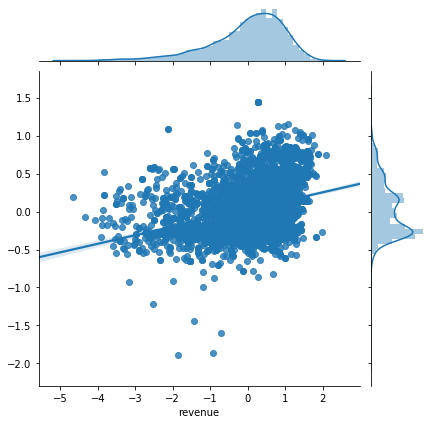

In [101]:
sns.jointplot(y_test,pred, kind='reg')